In [1]:
import os
import pandas as pd
import torch
import torchvision
from d2l import torch as d2l

import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [2]:
#@save
d2l.DATA_HUB['banana-detection'] = (
    d2l.DATA_URL + 'banana-detection.zip',
    '5de26c8fce5ccdea9f91267273464dc968d20d72')

In [3]:
#@save
def read_data_bananas(is_train=True):
    """读取香蕉检测数据集中的图像和标签"""
    data_dir = d2l.download_extract('banana-detection')
    csv_fname = os.path.join(data_dir, 'bananas_train' if is_train
                             else 'bananas_val', 'label.csv')
    csv_data = pd.read_csv(csv_fname)
    csv_data = csv_data.set_index('img_name')
    images, targets = [], []
    for img_name, target in csv_data.iterrows():
        images.append(torchvision.io.read_image(
            os.path.join(data_dir, 'bananas_train' if is_train else
                         'bananas_val', 'images', f'{img_name}')))
        # 这里的target包含（类别，左上角x，左上角y，右下角x，右下角y），
        # 其中所有图像都具有相同的香蕉类（索引为0）
        targets.append(list(target))
    # unsqueeze 将本身一维的边界框变成二维
    return images, torch.tensor(targets).unsqueeze(1) / 256

In [4]:
#@save
class BananasDataset(torch.utils.data.Dataset):
    """一个用于加载香蕉检测数据集的自定义数据集"""
    def __init__(self, is_train):
        self.features, self.labels = read_data_bananas(is_train)
        print('read ' + str(len(self.features)) + (f' training examples' if
              is_train else f' validation examples'))

    def __getitem__(self, idx):
        return (self.features[idx].float(), self.labels[idx])

    def __len__(self):
        return len(self.features)

In [5]:
#@save
def load_data_bananas(batch_size):
    """加载香蕉检测数据集"""
    train_iter = torch.utils.data.DataLoader(BananasDataset(is_train=True),
                                             batch_size, shuffle=True)
    val_iter = torch.utils.data.DataLoader(BananasDataset(is_train=False),
                                           batch_size)
    return train_iter, val_iter

In [6]:
batch_size, edge_size = 32, 256
train_iter, _ = load_data_bananas(batch_size)
batch = next(iter(train_iter))
batch[0].shape, batch[1].shape

read 1000 training examples
read 100 validation examples


(torch.Size([32, 3, 256, 256]), torch.Size([32, 1, 5]))

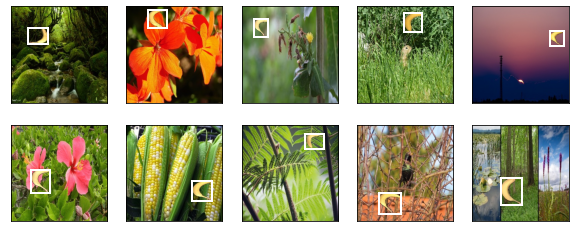

In [7]:
# permute 将 torch.Size([10, 3, 256, 256]) 转为 torch.Size([10, 256, 256, 3])
imgs = (batch[0][0:10].permute(0, 2, 3, 1)) / 255
axes = d2l.show_images(imgs, 2, 5, scale=2)
for ax, label in zip(axes, batch[1][0:10]):
    d2l.show_bboxes(ax, [label[0][1:5] * edge_size], colors=['w'])

In [11]:
csv_data = pd.read_csv('../data/banana-detection/bananas_train/label.csv')
csv_data = csv_data.set_index('img_name')

In [23]:
targets = []
for img_name, target in csv_data.iterrows():
    targets.append(list(target))
#     print(list(target))

torch.tensor(targets).unsqueeze(1)

tensor([[[  0, 104,  20, 143,  58]],

        [[  0,  68, 175, 118, 223]],

        [[  0, 163, 173, 218, 239]],

        ...,

        [[  0,  47,  54,  86, 109]],

        [[  0,  43, 125,  90, 166]],

        [[  0, 191,  99, 249, 152]]])

In [25]:
torch.tensor(targets)

tensor([[  0, 104,  20, 143,  58],
        [  0,  68, 175, 118, 223],
        [  0, 163, 173, 218, 239],
        ...,
        [  0,  47,  54,  86, 109],
        [  0,  43, 125,  90, 166],
        [  0, 191,  99, 249, 152]])